In [2]:
import networkx as nx
import osmnx as ox
import requests
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

ox.config(use_cache=True, log_console=True)
ox.__version__


'0.9'

In [24]:
class BoundingBox(object):
    """
    A 2D bounding box
    """
    def __init__(self, points):
        if len(points) == 0:
            raise ValueError("Can't compute bounding box of empty list")
        self.minx, self.miny = float("inf"), float("inf")
        self.maxx, self.maxy = float("-inf"), float("-inf")
        for x, y in points:
            # Set min coords
            if x < self.minx:
                self.minx = x
            if y < self.miny:
                self.miny = y
            # Set max coords
            if x > self.maxx:
                self.maxx = x
            elif y > self.maxy:
                self.maxy = y
    @property
    def width(self):
        return self.maxx - self.minx
    @property
    def height(self):
        return self.maxy - self.miny
    def __repr__(self):
        return "[{}, {}, {}, {}]".format(
            self.minx, self.maxx, self.miny, self.maxy)
# Usage example:

In [29]:
coords = [
[-43.204765,-22.962187],[-43.204765,-22.945906],[-43.176613,-22.945906],[-43.176613,-22.962187]
]

box = BoundingBox(coords)
box

[-43.204765, -43.176613, -22.962187, -22.945906]

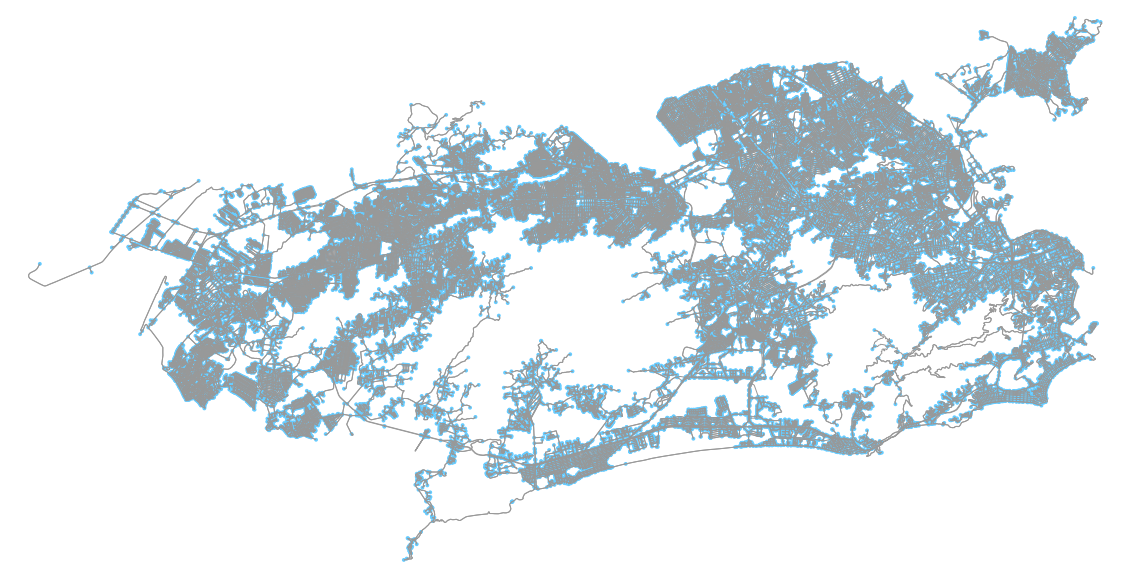

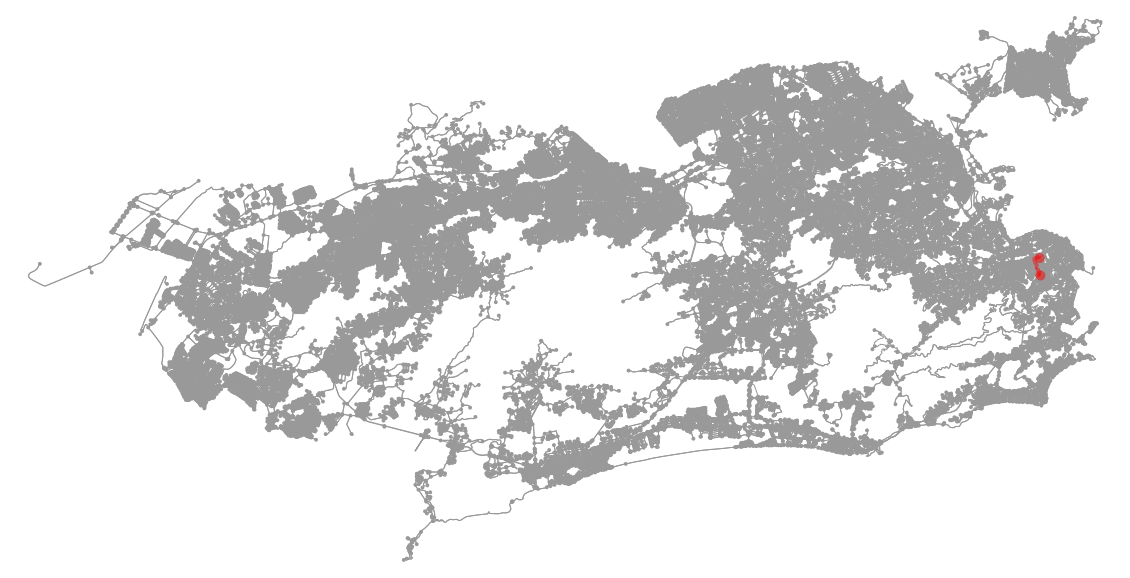

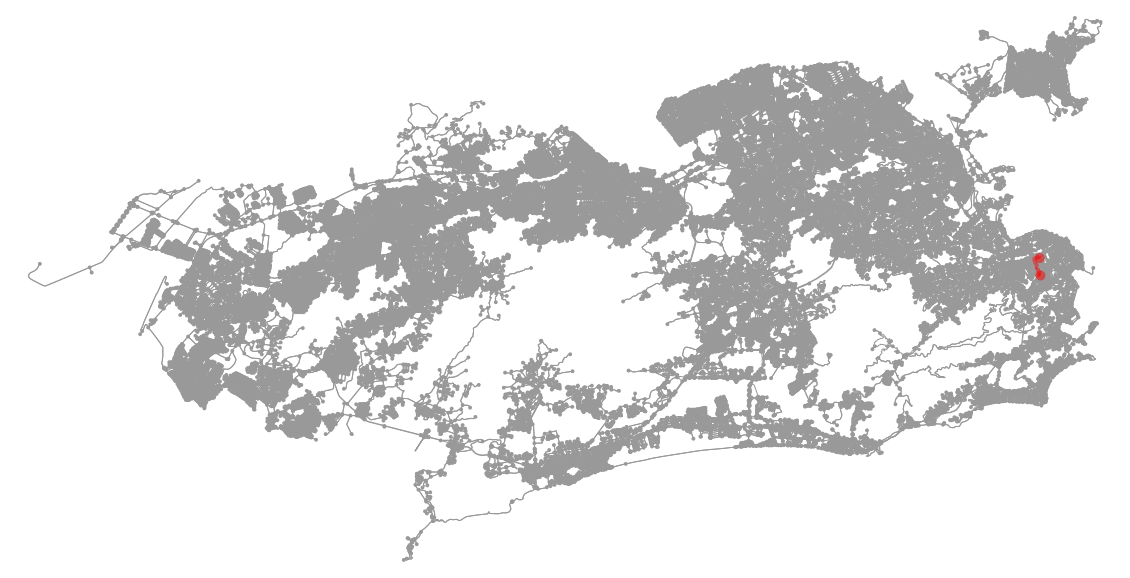

In [34]:
box = [-43.204765, -43.176613, -22.962187, -22.945906]

G = ox.graph_from_place('Rio de Janeiro, Rio de Janeiro, Brazil', network_type='drive')

fig, ax = ox.plot_graph(G, fig_height=20, fig_width=20)

# PEGANDO A PROJEÇÃO DE NODE MAIS PRÓXIMO DE UM PAR DE COORDENADAS

good_orig = ox.get_nearest_node(G, (-22.91587,-43.19635), method='haversine')
bad_orig = ox.get_nearest_node(G, (-22.91729,-43.19258), method='haversine')
destino = ox.get_nearest_node(G, (-22.90844, -43.19309), method='haversine')



# TENTATIVA DE PROJEÇÃO DE EDGE NODE MAIS PRÓXIMO DE UM PAR DE COORDENADAS

'''
good_orig = ox.get_nearest_edge(G2, (-22.91587,-43.19635))
bad_orig = ox.get_nearest_edge(G2, (-22.91729,-43.19258))
destino = ox.get_nearest_edge(G2, (-22.90844, -43.19309))

'''
# finding a route between the nodes
rota = nx.shortest_path(G, good_orig, destino, weight='length')
# plot
fig, ax = ox.plot_graph_route(G, route, fig_height=20, fig_width=20)


# finding a route between the nodes
rota = nx.shortest_path(G, bad_orig, destino, weight='length')
# plot
fig, ax = ox.plot_graph_route(G, route, fig_height=20, fig_width=20)